In [39]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

style.use('fivethirtyeight') # librairies stylé
import plotly.express as px
from scipy.optimize import minimize

In [2]:
number_of_crypto = 20
df_name_index = pd.read_csv(f"./data/processed/first_{number_of_crypto}_crypto_list.csv", index_col=0)
df = pd.read_csv("./data/processed/market_cap_crypto.csv", index_col=0)

df_close_price = pd.read_csv('./data/processed/close_price_crypto.csv', index_col=0)
df_close_price['date'] = pd.to_datetime(df_close_price.index)
df_close_price['date'] = df_close_price['date'].dt.date
df_close_price.index = df_close_price['date']
del df_close_price['date']

In [3]:
#faire lib poru faciliter ça
columns = df_name_index['crypto_name']

df_index = df[columns]
df_index.head(4)
df_index['total_market_cap'] = df_index.sum(axis=1)

df_index['date'] = pd.to_datetime(df_index.index)
df_index['date'] = df_index['date'].dt.date
df_index.index = df_index['date']
del df_index['date']

list_index = []
for i in range(len(df_index.index)):
    v = df_index.index[i]
    list_index.append(v)


last_date = df_name_index['first_date'].values[-1]

list_index = np.array(list_index)

last_date = pd.to_datetime(last_date)

index = np.where(list_index == last_date)[0][0]

df_final_index = df_index.iloc[index:,:]
df_close_price = df_close_price[columns]
df_close_price_index = df_close_price.iloc[index:,:]
df_close_price_index.head(4)

/var/folders/hv/kjs_mg3s28b_rhljhxq6r2f80000gp/T/ipykernel_1197/996342493.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_index['total_market_cap'] = df_index.sum(axis=1)
/var/folders/hv/kjs_mg3s28b_rhljhxq6r2f80000gp/T/ipykernel_1197/996342493.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_index['date'] = pd.to_datetime(df_index.index)
/var/folders/hv/kjs_mg3s28b_rhljhxq6r2f80000gp/T/ipykernel_1197/996342493.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

,bitcoin,litecoin,namecoin,feathercoin,primecoin,peercoin,ripple,nxt,dogecoin,omni,vertcoin,digibyte,reddcoin,dash,counterparty,monacoin,gulden,einsteinium,groestlcoin,maidsafecoin
date,,,,,,,,,,,,,,,,,,,,
2014-04-28,440.285,10.1321,2.03216,0.085083,0.793390,2.07110,0.005139,0.021878,0.000481,36.9488,0.837159,0.000134,0.000013,1.66920,1.54279,0.042028,0.000876,0.001990,0.002105,0.018727
2014-04-29,447.209,10.4004,2.10869,0.088723,0.777257,2.12794,0.005362,0.021240,0.000495,37.9027,0.859236,0.000242,0.000035,1.63593,1.57206,0.042037,0.000760,0.001943,0.004403,0.017312
2014-04-30,447.645,10.9026,2.15499,0.089333,0.771961,2.18362,0.005364,0.021998,0.000501,36.5885,0.882842,0.000336,0.000036,1.53875,1.45982,0.043198,0.000773,0.002068,0.004740,0.015866
2014-05-01,457.760,11.0982,2.23516,0.090725,0.790255,2.22041,0.005413,0.023056,0.000504,36.7793,0.899082,0.000330,0.000023,1.51508,1.56207,0.043908,0.000832,0.002153,0.003941,0.014065


In [4]:
windows = 30

df_return = np.log(df_close_price_index/df_close_price_index.shift(1)).dropna()
df_return.head(4)



,bitcoin,litecoin,namecoin,feathercoin,primecoin,peercoin,ripple,nxt,dogecoin,omni,vertcoin,digibyte,reddcoin,dash,counterparty,monacoin,gulden,einsteinium,groestlcoin,maidsafecoin
date,,,,,,,,,,,,,,,,,,,,
2014-04-29,0.015604,0.026136,0.036968,0.041889,-0.020544,0.027075,0.042484,-0.029577,0.029284,0.025489,0.026030,0.593719,0.983224,-0.020133,0.018794,0.000216,-0.141458,-0.023974,0.737751,-0.078578
2014-04-30,0.000974,0.047157,0.021719,0.006854,-0.006837,0.025830,0.000405,0.035065,0.012716,-0.035288,0.027103,0.328181,0.015488,-0.061241,-0.074074,0.027227,0.016616,0.062287,0.073744,-0.087210
2014-05-01,0.022345,0.017782,0.036527,0.015469,0.023422,0.016708,0.009125,0.046966,0.006659,0.005201,0.018228,-0.018190,-0.428008,-0.015502,0.067699,0.016298,0.074066,0.040296,-0.184555,-0.120517
2014-05-02,-0.018483,-0.055217,-0.056479,-0.057946,-0.031776,-0.048793,-0.018302,0.003170,-0.045189,-0.048759,-0.044908,-0.136421,-0.261696,-0.116757,-0.180215,-0.015456,-0.069382,-0.040586,0.099804,0.018987


# Description of data

In [5]:
# add 
df_return.describe()

,bitcoin,litecoin,namecoin,feathercoin,primecoin,peercoin,ripple,nxt,dogecoin,omni,vertcoin,digibyte,reddcoin,dash,counterparty,monacoin,gulden,einsteinium,groestlcoin,maidsafecoin
count,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000
mean,0.001868,0.001210,-0.000055,-0.000339,-0.000576,-0.000186,0.002052,0.000067,0.002479,NaN,0.000154,0.002293,0.001777,0.001920,0.001140,NaN,0.001346,0.000906,0.002611,0.001321
std,0.038895,0.056881,0.086385,0.098376,0.099670,0.069675,0.068463,0.071285,0.074195,NaN,0.095073,0.091649,0.134664,0.066962,0.109814,NaN,0.079513,0.106282,0.131781,0.069789
min,-0.455311,-0.514580,-1.152009,-1.184236,-0.758563,-0.664670,-0.616288,-0.600796,-0.515112,-inf,-0.638346,-0.534880,-1.556633,-0.465459,-0.802247,-inf,-0.550624,-0.803915,-0.869595,-0.564348
25%,-0.012477,-0.020027,-0.029404,-0.041783,-0.042507,-0.029500,-0.020949,-0.031427,-0.022280,-0.050694,-0.040912,-0.038172,-0.057574,-0.025462,-0.045767,-0.028269,-0.035416,-0.041850,-0.045904,-0.033816
50%,0.001930,-0.000429,-0.001730,-0.004608,-0.003867,-0.001179,-0.001666,-0.002779,-0.001538,-0.001181,-0.004029,-0.003768,-0.001051,-0.000861,-0.002116,-0.002124,-0.003200,-0.001144,-0.002198,0.000888
75%,0.017909,0.021054,0.029010,0.035959,0.037289,0.026954,0.020327,0.027788,0.019037,0.044017,0.032948,0.034510,0.051902,0.026827,0.041465,0.024493,0.030810,0.038048,0.040587,0.036762
max,0.225119,0.511417,0.750320,0.775422,1.115907,0.567424,1.027379,0.588189,1.516382,inf,0.877652,1.165519,1.629712,0.768664,1.196803,inf,0.580836,1.051086,1.381296,0.493305


<AxesSubplot:xlabel='date'>

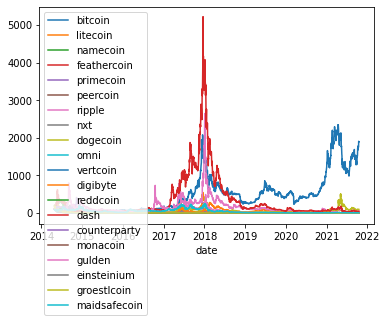

In [6]:
cum_return = df_return.add(1).cumprod()*100
cum_return.head(4)
cum_return.plot()

# Min-variance Part

In [7]:
# add 
df_vol_120 = df_return.rolling(120).std().dropna()
df_vol_120

,bitcoin,litecoin,namecoin,feathercoin,primecoin,peercoin,ripple,nxt,dogecoin,omni,vertcoin,digibyte,reddcoin,dash,counterparty,monacoin,gulden,einsteinium,groestlcoin,maidsafecoin
date,,,,,,,,,,,,,,,,,,,,
2014-11-26,0.033169,0.049173,0.051382,0.105568,0.090437,0.086522,0.043182,0.055099,0.078728,0.110639,0.083145,0.087160,0.093273,0.115873,0.099652,0.159959,0.119983,0.155926,0.168561,0.057335
2014-11-27,0.033087,0.048996,0.051350,0.105987,0.090192,0.086384,0.045932,0.055051,0.078781,0.110516,0.082521,0.087541,0.093203,0.115707,0.099293,0.158497,0.120241,0.155362,0.168261,0.057285
2014-11-28,0.032978,0.048865,0.051300,0.104807,0.090197,0.086302,0.046218,0.054271,0.078738,0.105847,0.076235,0.091653,0.093751,0.113782,0.098688,0.152508,0.120344,0.155307,0.184699,0.058141
2014-11-29,0.032934,0.048799,0.051254,0.104802,0.090197,0.086249,0.046884,0.054557,0.078741,0.105626,0.076074,0.091920,0.093479,0.113769,0.098670,0.148603,0.120372,0.153818,0.209020,0.058010
2014-11-30,0.032945,0.048799,0.051300,0.104810,0.090192,0.086218,0.051293,0.054544,0.078724,0.105197,0.076117,0.092832,0.093326,0.113761,0.098780,0.135933,0.120375,0.151064,0.207243,0.057258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-13,0.037701,0.049912,0.065976,0.075824,0.059517,0.061505,0.061168,0.066559,0.070961,0.098439,0.060544,0.064098,0.112960,0.056869,0.254593,0.039649,0.058714,0.112960,0.068635,0.057644
2021-10-14,0.037432,0.049693,0.066147,0.075823,0.059505,0.061431,0.061038,0.066134,0.070875,0.098411,0.060499,0.063940,0.112034,0.056702,0.253876,0.039414,0.055779,0.111583,0.068386,0.058028
2021-10-15,0.037936,0.049873,0.066246,0.076250,0.059200,0.061414,0.061035,0.065887,0.070879,0.097970,0.060496,0.063976,0.112094,0.056805,0.254032,0.039421,0.054418,0.110613,0.068482,0.058856


In [8]:
#Long Asset with Low Vol
returns_vol_quantile = df_vol_120.T.apply(lambda x: pd.qcut(x, 5, labels=False, duplicates="drop"), axis=0).T

for i in returns_vol_quantile.columns:
    returns_vol_quantile.loc[returns_vol_quantile[i] == 0, i] = 0.5 # First quantile for vol
    returns_vol_quantile.loc[returns_vol_quantile[i] == 1, i] = 0
    returns_vol_quantile.loc[returns_vol_quantile[i] == 2, i] = 0
    returns_vol_quantile.loc[returns_vol_quantile[i] == 3, i] = 0
    returns_vol_quantile.loc[returns_vol_quantile[i] == 4, i] = -0.5

## Low Vol part ##
returns_low_vol_quantile = returns_vol_quantile.replace(0.5,1)
returns_low_vol_quantile = returns_low_vol_quantile.replace(-0.5,0)
returns_low_vol_quantile['sum'] = returns_low_vol_quantile.sum(axis=1)

#better to do things => here Low Vol portfolio
# Do the same things about High vol
for i in tqdm(returns_low_vol_quantile.index):
    number = returns_low_vol_quantile['sum'].loc[i]
    for column in returns_low_vol_quantile.columns:
        returns_low_vol_quantile[column].loc[i] = returns_low_vol_quantile[column].loc[i] / number

del returns_low_vol_quantile['sum']

## High Vol part ##

returns_high_vol_quantile = returns_vol_quantile.replace(-0.5,1)
returns_high_vol_quantile = returns_high_vol_quantile.replace(0.5,0)
returns_high_vol_quantile['sum'] = returns_high_vol_quantile.sum(axis=1)

#better to do things => here Low Vol portfolio
# Do the same things about High vol
for i in tqdm(returns_high_vol_quantile.index):
    number = returns_high_vol_quantile['sum'].loc[i]
    for column in returns_high_vol_quantile.columns:
        returns_high_vol_quantile[column].loc[i] = returns_high_vol_quantile[column].loc[i] / number

del returns_high_vol_quantile['sum']

#np.sum(returns_low_vol_quantile, axis=1) # check sum of weights equal to 1

100%|██████████| 2149/2149 [00:24<00:00, 89.13it/s]


/var/folders/hv/kjs_mg3s28b_rhljhxq6r2f80000gp/T/ipykernel_1197/2751199318.py:4: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  low_vol_return = np.multiply(df_return_vol, returns_low_vol_quantile)
/var/folders/hv/kjs_mg3s28b_rhljhxq6r2f80000gp/T/ipykernel_1197/2751199318.py:7: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned befo

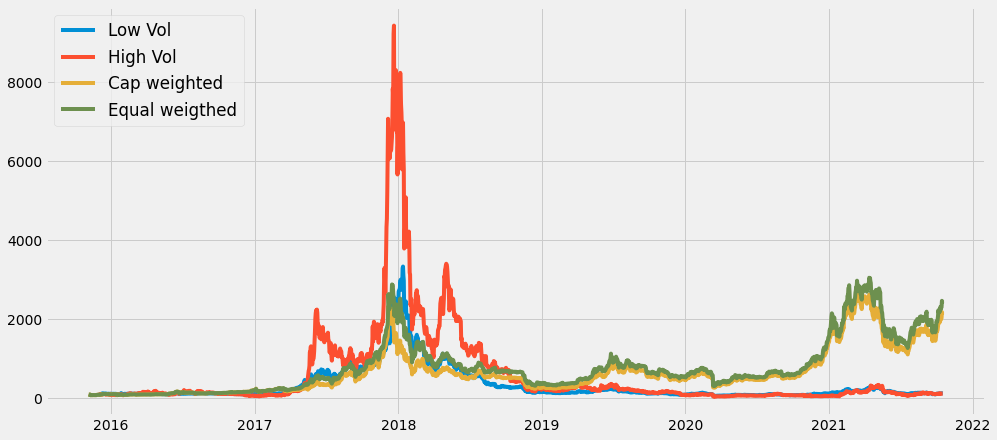

In [56]:

diff = df_return.shape[0] - returns_high_vol_quantile.shape[0]
df_return_vol = df_return.iloc[diff:,]

low_vol_return = np.multiply(df_return_vol, returns_low_vol_quantile)
low_vol_perf = np.sum(low_vol_return,1)

high_vol_return = np.multiply(df_return_vol, returns_high_vol_quantile)
high_vol_perf = np.sum(high_vol_return,1)

# à processer avant
df_cw = pd.read_csv(f'./data/processed/perf_CW_20_price.csv',index_col=0)
df_cw['date'] = pd.to_datetime(df_cw.index)
df_cw.index = df_cw['date']
del df_cw['date']
df_cw = df_cw.iloc[diff:,]

df_ew = pd.read_csv(f'./data/processed/perf_EW_20_price.csv',index_col=0)
df_ew['date'] = pd.to_datetime(df_ew.index)
df_ew.index = df_ew['date']
del df_ew['date']
df_ew = df_ew.iloc[diff:,]


plt.figure(figsize=(15,7))
plt.plot((low_vol_perf+1).cumprod()*100)
plt.plot((high_vol_perf+1).cumprod()*100)
plt.plot(df_cw['cap_weighted_index'].add(1).cumprod()*100)
plt.plot(df_ew['ponderated_index'].add(1).cumprod()*100)
plt.legend(['Low Vol','High Vol','Cap weighted', 'Equal weigthed'],loc='upper left',fontsize='large')
plt.show()



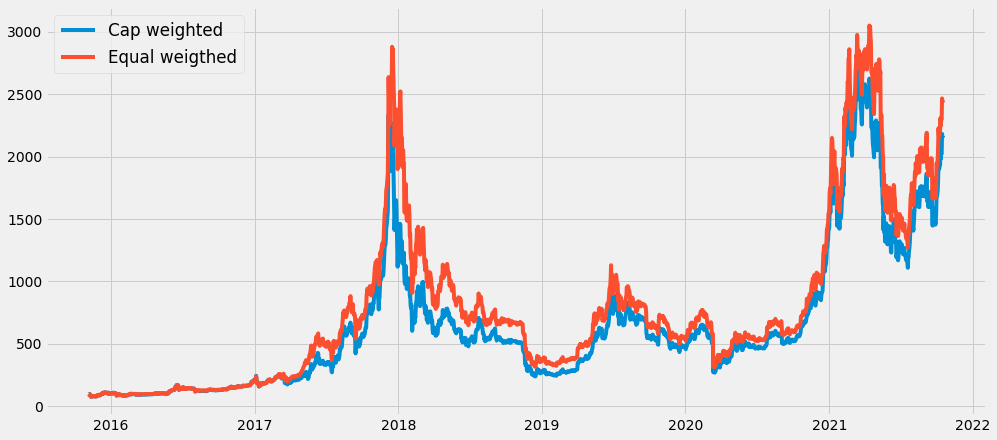

In [55]:
plt.figure(figsize=(15,7))
plt.plot((df_cw['cap_weighted_index']+1).cumprod()*100)
plt.plot((df_ew['ponderated_index']+1).cumprod()*100)
plt.legend(['Cap weighted','Equal weigthed'],loc='upper left',fontsize='large')
plt.show()

In [54]:
df_ew = pd.read_csv(f'./data/processed/perf_EW_20_price.csv',index_col=0)
df_ew['date'] = pd.to_datetime(df_ew.index)
df_ew.index = df_ew['date']
del df_ew['date']
df_ew = df_ew.iloc[diff:,]
df_ew.head(4)

,ponderated_index
date,
2015-11-05,-0.063594
2015-11-06,-0.031203
2015-11-07,0.031545
2015-11-08,-0.035864


In [31]:
df_ew.dtypes

ponderated_index    float64
date                 object
dtype: object

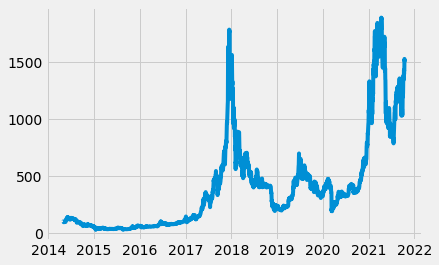

In [44]:
plt.plot(df_ew.add(1).cumprod()*100)

In [53]:
data = {
    "Low_vol": low_vol_perf,
    'High_return': high_vol_perf
}
df_vol_strat =  pd.DataFrame(data)

df_vol_strat.head(4)

,Low_vol,High_return
date,,
2015-11-30,-0.007715,-0.014757
2015-12-01,-0.044534,-0.019616
2015-12-02,-0.020770,0.000640
2015-12-03,0.012108,-0.022153


<AxesSubplot:xlabel='date'>

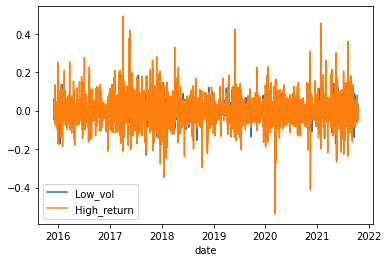

In [54]:
df_vol_strat.plot()

In [47]:
df_vol_strat.describe()

,Low_vol,High_return
count,2149.000000,2149.000000
mean,0.000965,0.003135
std,0.040826,0.078272
min,-0.404915,-0.536911
25%,-0.015769,-0.038249
50%,0.001352,0.000074
75%,0.019896,0.040375
max,0.183813,0.490807


In [37]:
low_vol_perf.head(4)

datetime
2015-11-30 00:00:00+00:00    NaN
2015-12-01 00:00:00+00:00   -inf
2015-12-02 00:00:00+00:00    NaN
2015-12-03 00:00:00+00:00    inf
dtype: float64

<AxesSubplot:xlabel='datetime'>

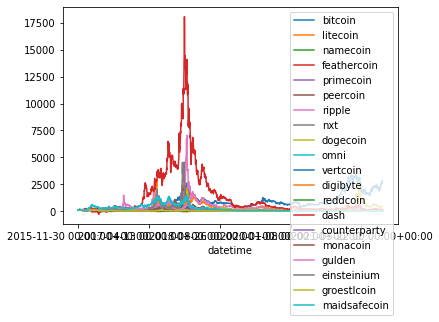

In [13]:
test = df_return_vol.add(1).cumprod()*100
test.plot()

In [14]:
df_return_vol.head(4)



,bitcoin,litecoin,namecoin,feathercoin,primecoin,peercoin,ripple,nxt,dogecoin,omni,vertcoin,digibyte,reddcoin,dash,counterparty,monacoin,gulden,einsteinium,groestlcoin,maidsafecoin
datetime,,,,,,,,,,,,,,,,,,,,
2015-11-30 00:00:00+00:00,0.016102,-0.013307,-0.010581,-0.000749,-0.046306,-0.011768,-0.023076,-0.001778,-0.014139,-0.033816,-0.095088,0.096912,-0.042626,0.006764,-0.072685,-0.006416,0.018021,-0.023502,-0.047133,-0.055198
2015-12-01 00:00:00+00:00,-0.040105,-0.052823,-0.058423,-0.011832,0.169187,-0.112429,-0.026784,0.001574,-0.009308,-0.089023,-0.045837,0.143902,-0.077916,-0.038812,-0.068538,-0.044607,-0.041660,0.022560,-0.014757,-0.003544
2015-12-02 00:00:00+00:00,-0.009148,-0.027344,-0.066646,0.012791,-0.119868,-0.015982,0.020059,-0.017795,0.021972,-0.007373,0.015271,-0.047865,0.084208,0.046148,-0.051357,-0.029169,-0.034897,0.035153,0.031473,-0.010748
2015-12-03 00:00:00+00:00,0.005162,0.010489,0.011616,-0.021770,-0.011627,0.001892,0.021167,0.000966,-0.010774,0.172171,0.025679,-0.059729,0.185442,0.067579,0.197022,-0.009641,-0.000475,0.030895,-0.109392,0.026893


In [53]:
low_vol_portfolio

array([-0.00771538, -0.00771538, -0.00771538, ...,  0.00360007,
        0.00360007,  0.00360007])

# Risk Parity part

In [11]:
def MCR_calc(alloc, Returns):
    """ 
    This function computes the marginal contribution to risk (MCR), which 
    determine how much the portfolio volatility would change if we increase
    the weight of a particular asset.
    
    Parameters
    ----------
    alloc : TYPE
        Weights in the investor's portfolio
    Returns : TYPE
        The returns of the portfolio's assets
    Returns
    -------
    MCR : Object
        Marginal contribution to risk (MCR)
    """
    ptf=np.multiply(Returns,alloc)
    ptfReturns=np.sum(ptf,1); # Summing across columns
    vol_ptf=np.std(ptfReturns)
    Sigma=np.cov(np.transpose(Returns))
    MCR=np.matmul(Sigma,np.transpose(alloc))/vol_ptf
    return MCR


In [16]:

###ERC Allocation###
def ERC(alloc,Returns):
    """ 
    This function computes the Equally-Weighted Risk Contribution Portfolio (ERC),
    which attributes the same risk contribution to all the assets.
    
    Parameters
    ----------
    alloc : TYPE
        Weights in the investor's portfolio
    Returns : TYPE
        The returns of the portfolio's assets
    Returns
    -------
    criterions : Object
        Optimal weights of assets in the portfolio.
    """
    ptf=np.multiply(Returns.iloc[:,:],alloc);
    ptfReturns=np.sum(ptf,1); # Summing across columns
    vol_ptf=np.std(ptfReturns);
    indiv_ERC=alloc*MCR_calc(alloc,Returns);
    criterion=np.power(indiv_ERC-vol_ptf/len(alloc),2)
    criterion=np.sum(criterion)*1000000000
    return criterion

#adpt code to manage difference number of crypto
x0 = np.array([0, 0, 0,0,0])+0.0001 #Set the first weights of the Gradient Descent

cons=({'type':'eq', 'fun': lambda x:sum(x)-1}) #Sum of weights is equal to 1

Bounds= [(0 , 1) for i in range(0,5)] #Long only positions


#Optimisation
res_ERC = minimize(ERC, x0, method='SLSQP', args=(df_return[['bitcoin','litecoin','dash','dogecoin','ripple']]),bounds=Bounds,constraints=cons,options={'disp': True})
print(res_ERC.x)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.0511150056916825
            Iterations: 10
            Function evaluations: 78
            Gradient evaluations: 10
[0.27795799 0.18865456 0.18160138 0.1652425  0.18654358]


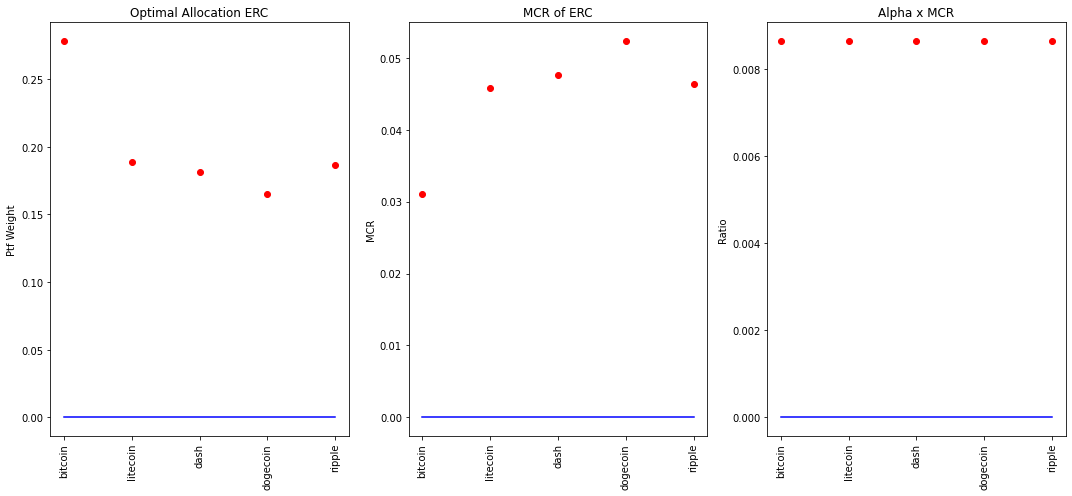

In [18]:
plt.figure(figsize=(15,7))

test_return = df_return[['bitcoin','litecoin','dash','dogecoin','ripple']]
labels = test_return.columns
weight_to_chart=np.array(res_ERC.x)
plt.subplot(131)
plt.plot(labels,weight_to_chart,'ro',labels,weight_to_chart*0,'b-')
plt.xticks(rotation=90)
plt.title('Optimal Allocation ERC')
plt.ylabel('Ptf Weight')
plt.tight_layout()

MCR_chart=MCR_calc(res_ERC.x, test_return)
MCR_chart=np.array(MCR_chart)
plt.subplot(132)
plt.plot(labels,MCR_chart,'ro',labels,MCR_chart*0,'b-')
plt.xticks(rotation=90)
plt.title('MCR of ERC')
plt.ylabel('MCR')
plt.tight_layout()

ratio=res_ERC.x*MCR_chart
plt.subplot(133)
plt.plot(labels,ratio,'ro',labels,ratio*0,'b-')
plt.xticks(rotation=90)
plt.title('Alpha x MCR')
plt.ylabel('Ratio')
plt.tight_layout()
# plt.savefig('Plot/ERC_output.png')
plt.show()

No handles with labels found to put in legend.


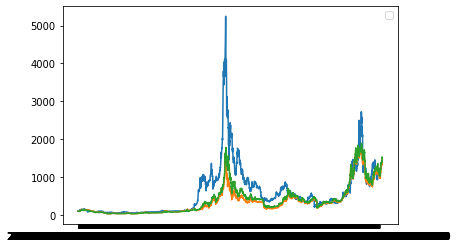

In [23]:
# Perf with ou different index
test_return = df_return[['bitcoin','litecoin','dash','dogecoin','ripple']]
test_portfolio = pd.DataFrame({'ERC': np.sum(np.multiply(test_return,np.transpose(res_ERC.x)),1)})
df_cw = pd.read_csv(f'./data/processed/perf_CW_20_price.csv')
df_ew = pd.read_csv(f'./data/processed/perf_EW_20_price.csv')
plt.plot((test_portfolio+1).cumprod()*100)
plt.plot((df_cw['cap_weighted_index']+1).cumprod()*100)
plt.plot((df_ew['ponderated_index']+1).cumprod()*100)
plt.legend()

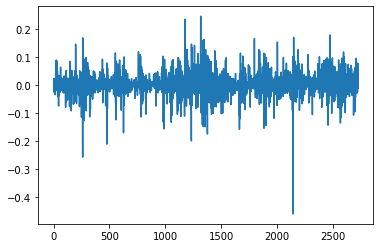

In [21]:
plt.plot(df_cw['cap_weighted_index'])

In [153]:

ptf=np.multiply(df_return[['bitcoin','litecoin']],[0.1,0.1])
ptfReturns=np.sum(ptf,1); # Summing across columns
vol_ptf=np.std(ptfReturns)
Sigma=np.cov(np.transpose(df_return[['bitcoin','litecoin']]))
MCR=np.matmul(Sigma,np.transpose([0.00001,0.0001]))/vol_ptf

# print(ptf)
# print(ptfReturns)
print(vol_ptf)

print(MCR)
print(df_return)
#np.std(df_return['omni'])

0.008774994085383153
[1.85595408e-05 3.85549978e-05]
                            bitcoin  litecoin  namecoin  feathercoin  \
datetime                                                               
2014-04-29 00:00:00+00:00  0.015604  0.026136  0.036968     0.041889   
2014-04-30 00:00:00+00:00  0.000974  0.047157  0.021719     0.006854   
2014-05-01 00:00:00+00:00  0.022345  0.017782  0.036527     0.015469   
2014-05-02 00:00:00+00:00 -0.018483 -0.055217 -0.056479    -0.057946   
2014-05-03 00:00:00+00:00 -0.026187 -0.018442 -0.026484    -0.033962   
...                             ...       ...       ...          ...   
2021-10-13 00:00:00+00:00  0.023979  0.027571  0.051035    -0.031228   
2021-10-14 00:00:00+00:00 -0.001387  0.013921 -0.052816    -0.000748   
2021-10-15 00:00:00+00:00  0.071887  0.047149 -0.043198     0.098176   
2021-10-16 00:00:00+00:00 -0.011459 -0.013999  0.056841     0.037877   
2021-10-17 00:00:00+00:00  0.005165  0.000745  0.006458     0.004837   

          